In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

In [2]:
rng = np.random.default_rng()

In [3]:
# Imposed load balance when there is less tasks then workers can be seen as 
# an assignment problem where tasks, which should be assigned multiple times,
# are considered to be distinct tasks with same associated weights. That is,
# columns corresponding to tasks are duplicated until the cost matrix is square.

# Should be divisible
N = 500
M = 10

value_matrix_ws = rng.uniform(0, 1, size=(N, M))
# Create square matrix so that linear_sum_assignment can be applied to it
value_matrix_opt = np.tile(value_matrix_ws, (1, N // M))
print(value_matrix_ws.shape, value_matrix_opt.shape)

(500, 10) (500, 500)


In [4]:
def worker_selection(A, N, M):
    ''' 
    Given cost matrix (in our case representing value for the crowdsourcer) A returns 
    an assignment overall value.
    '''
    round_profile = M * [N // M]
    edges = {(n, m): A[n, m] for n in range(A.shape[0]) for m in range(A.shape[1])}
    sorted_edges = sorted(edges.items(), key=lambda el: -el[1])
    value = 0
    
    assigned = np.zeros(A.shape[0], dtype=bool)
    for (n, m), weight in sorted_edges:
        if assigned[n] or round_profile[m] == 0:
            continue
        else:
            value += weight
            assigned[n] = True
            round_profile[m] -= 1
            
#     assert not np.any(round_profile)
    return value

def optimal(A):
    rows, cols = linear_sum_assignment(A, maximize=True)
    return A[rows, cols].sum()    

In [5]:
opt = optimal(value_matrix_opt)
ws = worker_selection(value_matrix_ws, N, M)
print(f'Optimal: {opt}')
print(f'Worker Selection: {ws}')
print(f'Error = {opt - ws}')

Optimal: 455.0264465646037
Worker Selection: 451.0008275319555
Error = 4.025619032648194


Text(0.5, 0, 'number of tasks')

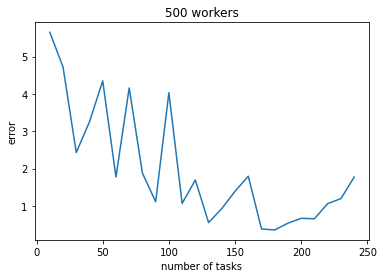

In [6]:
# Should be divisible
N = 500
M = 10

errors = []
X = range(M, N // 2, 10)

for M in X:
#     print(M)
    value_matrix_ws = rng.uniform(0, 1, size=(N, M))
    value_matrix_opt = np.tile(value_matrix_ws, (1, N // M))
    opt = optimal(value_matrix_opt)
    ws = worker_selection(value_matrix_ws, N, M)
    errors.append(opt - ws)

plt.plot(X, errors)
plt.title(f'{N} workers')
plt.ylabel('error')
plt.xlabel('number of tasks')

### Error increases with the ratio $\frac{N}{M}$

Text(0.5, 0, 'ratio $N/M$')

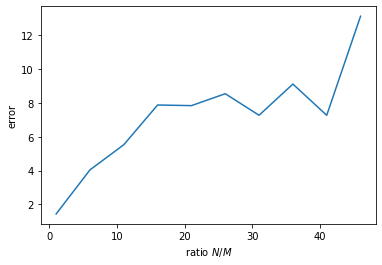

In [7]:
errors = []
X = range(1, 50, 5)
M_base = 50

for ratio in X:
#     print(ratio)
    N = M_base * ratio
    value_matrix_ws = rng.uniform(0, 1, size=(N, M_base))
    value_matrix_opt = np.tile(value_matrix_ws, (1, N // M_base))
    opt = optimal(value_matrix_opt)
    ws = worker_selection(value_matrix_ws, N, M_base)
    errors.append(opt - ws)

plt.plot(X, errors)
plt.ylabel('error')
plt.xlabel(r'ratio $N/M$')

In [13]:
# If we define task difficutly and worker skill vectors and assume that the solution quality depends on them:
task_difficulty = rng.uniform(0, 1, size=(1, M))
worker_skills = rng.uniform(0, 1, size=(N, 1))

value_matrix_ws = worker_skills @ task_difficulty
value_matrix_opt = np.tile(value_matrix_ws, (1, N // M))

In [14]:
opt = optimal(value_matrix_opt)
ws = worker_selection(value_matrix_ws, N, M)
print(f'Optimal: {opt}')
print(f'Worker Selection: {ws}')
print(f'Error = {opt - ws}')

Optimal: 750.0737229422577
Worker Selection: 750.0737229422562
Error = 1.5916157281026244e-12
